<a href="https://colab.research.google.com/github/mrigankoml/MLAP_Term-IV/blob/main/Clustering/Titanic_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [4]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/mrigankoml/MLAP_Term-IV/main/Clustering/titanic.csv")

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data = titanic_data.drop('PassengerId', axis=1)

In [7]:
titanic_data = titanic_data.drop('Name', axis=1)

In [8]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data = titanic_data.drop('Ticket', axis=1)
titanic_data = titanic_data.drop('Cabin', axis=1)
titanic_data = titanic_data.drop('Embarked', axis=1)

In [10]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encode = LabelEncoder()
encoded_sex = encode.fit_transform(titanic_data.iloc[:,0])
print(encoded_sex)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [13]:
titanic_data['Sex'] = encoded_sex

In [14]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [15]:
titanic_data = titanic_data.fillna(0)

In [16]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,0,0.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_titanic_data = scaler.fit_transform(titanic_data[['Survived',
                                                         'Pclass',
                                                         'Sex',
                                                         'Age',
                                                         'SibSp',
                                                         'Parch',
                                                         'Fare']])

In [18]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_titanic_data)
titanic_data["clusterid_new"] = clusters_new.labels_

In [19]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1
887,1,1,1,19.0,0,0,30.0000,2
888,0,3,0,0.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,2


In [20]:
import matplotlib.pyplot as plt

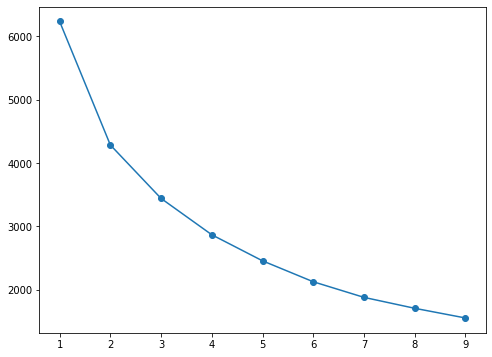

In [21]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit(scaled_titanic_data)
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(8,6))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

In [22]:
titanic_data[titanic_data.clusterid_new == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new
0,0,3,0,22.0,1,0,7.2500,1
4,0,3,0,35.0,0,0,8.0500,1
5,0,3,0,0.0,0,0,8.4583,1
6,0,1,0,54.0,0,0,51.8625,1
12,0,3,0,20.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
882,0,3,0,22.0,0,0,10.5167,1
883,0,2,0,28.0,0,0,10.5000,1
884,0,3,0,25.0,0,0,7.0500,1
886,0,2,0,27.0,0,0,13.0000,1


In [23]:
titanic_data[titanic_data.clusterid_new == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new
7,0,3,0,2.0,3,1,21.0750,0
13,0,3,0,39.0,1,5,31.2750,0
16,0,3,0,2.0,4,1,29.1250,0
24,0,3,0,8.0,3,1,21.0750,0
25,1,3,1,38.0,1,5,31.3875,0
...,...,...,...,...,...,...,...,...
846,0,3,0,0.0,8,2,69.5500,0
850,0,3,0,4.0,4,2,31.2750,0
863,0,3,0,0.0,8,2,69.5500,0
885,0,3,0,39.0,0,5,29.1250,0


In [24]:
titanic_data[titanic_data.clusterid_new == 2]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
8,1,3,1,27.0,0,2,11.1333,2
9,1,2,1,14.0,1,0,30.0708,2
...,...,...,...,...,...,...,...,...
875,1,3,1,15.0,0,0,7.2250,2
879,1,1,1,56.0,0,1,83.1583,2
880,1,2,1,25.0,0,1,26.0000,2
887,1,1,1,19.0,0,0,30.0000,2


In [29]:
titanic_data['Age'].describe()

count    891.000000
mean      23.799293
std       17.596074
min        0.000000
25%        6.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
titanic_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64